# Delta T plots

In [14]:
import numpy as np  # http://www.numpy.org
import matplotlib.pyplot as plt   # http://matplotlib.org
import math as M  # https://docs.python.org/2/library/math.html
from sympy.solvers import solve
from sympy import Symbol
from scipy.optimize import fsolve
from scipy.integrate import odeint

In [15]:
#### Constants #####
L_x = 1000000 #zonal extent [m]
L_y = 2000000 #meridional extent [m]
A = L_x*L_y #surface area of interior [m^2] Note that the interior is probably smaller than this
P = 2*L_x+2*L_y #Perimeter [m]

g = 9.81 #gravitational acceleration [m/s^2]
C_p = 3994 #specific heat capacity of sea water [J/(kg K)] source: Steffie's paper
alpha_T = 0.2 #thermal expansion coefficient [kg m^-3 C^-1] source: Steffie's paper
alpha_S = 0.8 #Haline expansion coefficient [kg m^-3]
c = 0.006 #bottom slope coefficient
s = 0.02 #average bottom slope around the perimeter of the marginal sea
S_ref = 35 #reference salinity [ppt]. Spall [2015]
T_ref = 8 #reference temperature [C]
E = -2e-8 #constant freshwater flux [m/s]
S_1 = 35.2 #from Lambert [g kg^-1]

#### Parameters ####
H = 1000 #sill height [m]
f_0 = 1.2e-4 #Coriolis parameter [s^-1]
Gamma = 20 #Restoring strength [W/(m^2 C)]

L = H/s #width of sloping topography of the boundary current [m]
T_1 = 8.87 #ingoing temperature [Celsius]
T_A = 2.8 #Atmospheric temperature [Celsius]
ro_0 = 1028  #density sea water [kg m^-3]. Range of 7 to 9 degrees of sea water
#h_1 = ... #thickness upper layer [m]

#### functions ####
epsilon = c*P/L #ratio of heat fluxed into interior by eddies compared to heat flux by advection into the basin in the inflowing boundary current [-]
mu = A*Gamma*f_0/(alpha_T*g*C_p*H**2*(T_1-T_A)) #[-]

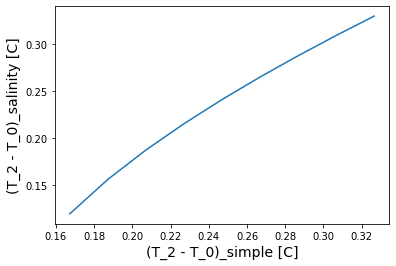

<function matplotlib.pyplot.show(*args, **kw)>

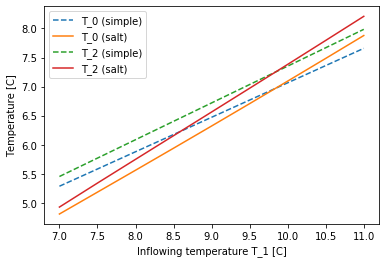

In [27]:
T_1_array = [7,7.5,8,8.5,9,9.5,10,10.5,11]

#Salinity model
T_0 = np.zeros(len(T_1_array))
T_2 = np.zeros(len(T_1_array))
S_0 = np.zeros(len(T_1_array))
S_2 = np.zeros(len(T_1_array))
Delta_T = np.zeros(len(T_1_array))

for i in range(len(T_1_array)):
    T_1=T_1_array[i]
    def main(x): # function with seven unkowns:  T_0,  T_2,  S_0,  S_2,  V_1, T_eddy, S_eddy 
                 #                              x[0], x[1], x[2], x[3], x[4],   x[5],   x[6]
        return [P*H*x[5]-A*Gamma*(x[0]-T_A)/(ro_0*C_p),
                P*H*x[6]+A*E*S,
                (T_1-x[1])*x[4]*H*L-(x[0] - T_A + (P*L/A)*(T_1-T_A))*A*Gamma/(ro_0*C_p),
                (S_1-x[3])*x[4]*H*L+E*A*S+P*L*E*S,
                g*H/(2*ro_0*f_0*L)*(alpha_T*(T_1-x[0])-alpha_S*(S_1-x[2]))-x[4],
                c*x[4]*(T_1-x[0])-x[5],
                c*x[4]*(S_1-x[2])-x[6]]
    [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])
    Delta_T[i] = T_2[i] - T_0[i]

#Simple model
T_0_simp = np.zeros(len(T_1_array))
T_out_simp = np.zeros(len(T_1_array))
Delta_T_simp = np.zeros(len(T_1_array))

for i in range(len(T_1_array)):
    T_0_simp[i] = T_1_array[i] - ((mu)/epsilon)*(M.sqrt(1+2*epsilon/(mu))-1)*(T_1_array[i] - T_A)
    T_out_simp[i] = T_1_array[i] - 2*mu*((T_1_array[i]-T_A)/(T_1_array[i]-T_0_simp[i])*(1+P*L/A)-1)*(T_1_array[i]-T_A)
    Delta_T_simp[i] = T_out_simp[i] - T_0_simp[i]
    
plt.plot(Delta_T_simp, Delta_T)
plt.xlabel('(T_2 - T_0)_simple [C]', fontsize=14) # label along x-axes
plt.ylabel('(T_2 - T_0)_salinity [C]', fontsize=14) # label along y-axes
plt.show()

plt.plot(T_1_array, T_0_simp, '--', label='T_0 (simple)')
plt.plot(T_1_array, T_0, label='T_0 (salt)')
plt.plot(T_1_array, T_out_simp, '--', label='T_2 (simple)')
plt.plot(T_1_array, T_2, label='T_2 (salt)')
plt.xlabel('Inflowing temperature T_1 [C]')
plt.ylabel('Temperature [C]')
plt.legend()
plt.show

A linear relation between is depicted

As is shown in the temperature as a function of T_1 plot, increasing inflowing temperature results in a larger increase in both the interior and outflowing temperature in the salt model than in the simple model. T_1 thus plays a more dominant role in the salt model. The more energy you put in the system (T1), the larger the fraction between T0 and T2 becomes, so the larger the fraction of heat to the outflowing temperature goes.